In [1]:
from __init__ import Database
from matplotlib import pyplot as plt
import sklearn.feature_extraction.image
from sklearn.feature_extraction.image import extract_patches
import tables

In [2]:
from extractor import extractor_super_resolution
args = {}
args['filedir'] = 'ImageNet_flowers'
args['pattern'] = '*.bmp'
args['database_name'] = 'mock'
args['export_dir'] = 'export'
args['data_shape'] = {"img":(64,64,3),"label":(64,64,3)}
args['pattern'] = '*.JPEG'
args['chunk_width'] = 16
args['meta'] = {
    'stride_size':32,
}
args['group_level'] = 0
args['extractor'] = extractor_super_resolution
data_set = Database(**args)

In [3]:
data_set.write_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 13.90it/s]


{'img': 28246, 'label': 28246}

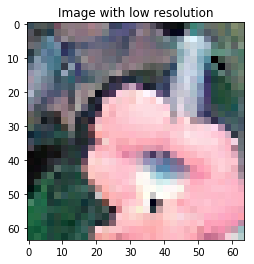

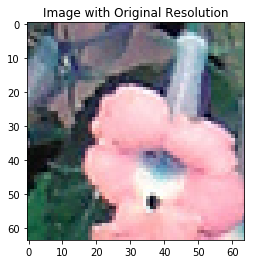

In [4]:
#get img and label
mock_im,mock_label = data_set['val',25]
plt.figure()
plt.title("Image with low resolution")
plt.imshow(mock_im)
plt.figure()
plt.title("Image with Original Resolution")
_ = plt.imshow(mock_label)

In [5]:
#get batches into a tensor - 2patches
mock_im_tensor,mock_label_tensor = data_set['val',25:27] #2 
print(mock_im_tensor.shape)
print(mock_label_tensor.shape)

(2, 64, 64, 3)
(2, 64, 64, 3)


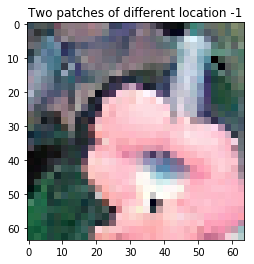

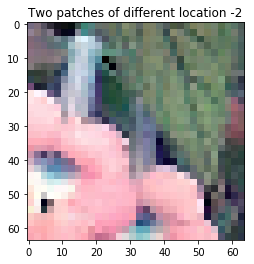

In [6]:
#two different patches

_ = plt.figure()
plt.title("Two patches of different location -1")
plt.imshow(mock_im_tensor[0,])
_ = plt.figure()
plt.title("Two patches of different location -2")
plt.imshow(mock_im_tensor[1,])

In [7]:
print(data_set.group_level)
print(data_set.size('train'))
print(data_set.size('val'))

0
24774
3472


In [8]:
args_recover = {}
args_recover['database_name'] = 'mock'
args_recover['export_dir'] = 'export'
args_recover['readonly'] = True
data_recover = Database(**args_recover)

In [10]:
print(data_recover['train',0][0].shape)

(64, 64, 3)


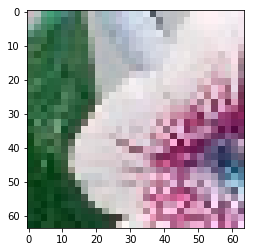

In [11]:
plt.imshow(data_recover['train',0][0])